In [11]:
#import Library 
import cv2
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
# from sklearn import mixture
from copy import copy, deepcopy


# 1.1 K-means clustering

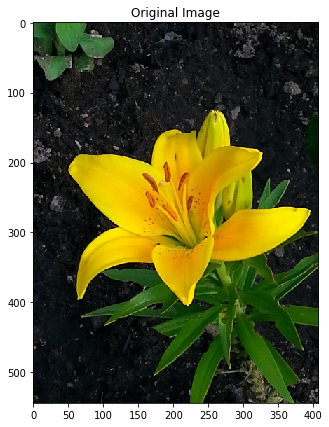

In [4]:
# Read an image
img = cv2.cvtColor(cv2.imread('yellowlily.png'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.imshow(img)
plt.title("Original Image")
plt.show()

# Arrange img to a feature matrix and convert it to np.float32
Z = img.reshape((-1,3))
traind = np.float32(Z)

#normalizing the RGB matrix
traind /= 255.0


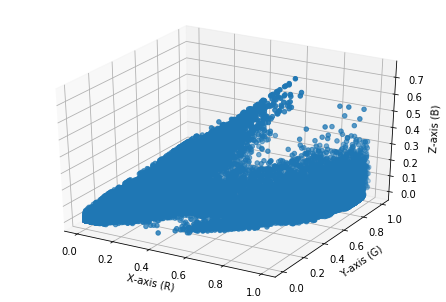

In [5]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(traind[:, 0], traind[:, 1],traind[:, 2])
ax.set_xlabel('X-axis (R)')
ax.set_ylabel('Y-axis (G)')
ax.set_zlabel('Z-axis (B)')
plt.show()

In [6]:
# The code in the above website was only used as reference
#source: https://codereview.stackexchange.com/questions/205097/k-means-using-numpy
def k_means(traind, k, num_iter):
 
    max_val = np.max(traind, axis=0)
    min_val = np.min(traind, axis=0)

    samples = traind.shape[0]
    d = traind.shape[1] # RGB #3

    # labels : array containing labels for data points, randomly initialized 
    # we have 2 labels here
    labels = np.random.randint(low=0, high=k, size=samples)
    
    # randomly initialized s.t. data_min <= centroid < data_max
    # choose random number btween 0 and 1
    centroids = np.random.uniform(low=min_val, high=max_val, size=(k,d)) #2x3

    # start k-means 
    for i in range(num_iter):
        # return the norm distance btween each point and the 2 centroids # 2.img.shape[1]
        #axis 1 means takes noem row wise
        distances = np.array(
            [np.linalg.norm(traind - c, axis=1) for c in centroids]) 
        #print(distances)
        #print(distances.shape) # 2ximg.shape[1]
        # new_labels : computed by finding centroid with minimal distance
        labels = np.argmin(distances, axis=0) #for each col (data points) find wich centroids is closer

        for c in range(k):
            # computing centroids by taking the mean over associated data points
            centroids[c] = np.mean(traind[labels == c], axis=0) #sum all data points(col) that belong to this centroids to find new mean
    return labels,centroids           
                

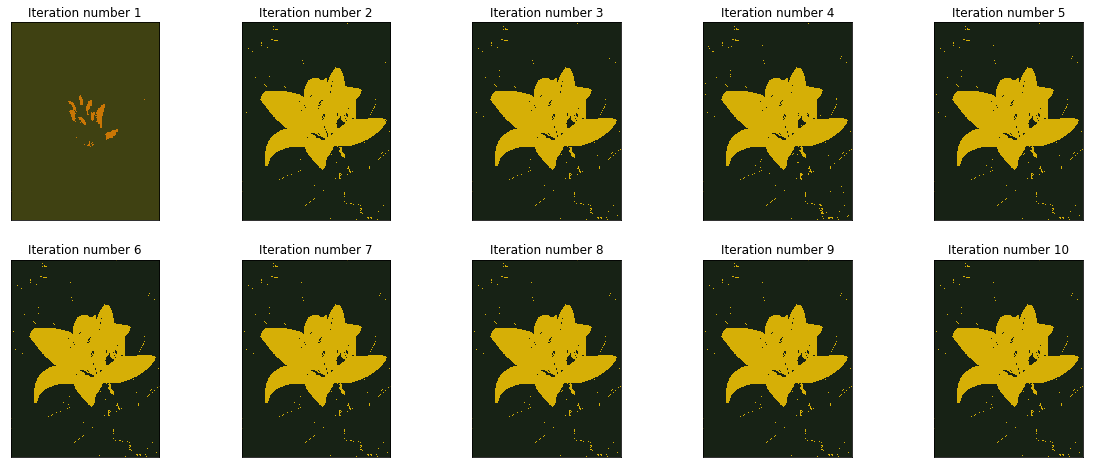

In [7]:
# set figure size
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,8))
#sorce: http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
axes_list = [item for sublist in axes for item in sublist]
# loop to display the 10 first iteration
for i in range(1,11):
    
    label,centers=k_means(traind,2,i)
    #convert to int(Unsigned integer (0 to 255))
    centers *= 255.0
    centers = np.uint8(centers)
    #print(centers.shape)
    # when ever the label is 1 we set it to be the same color as c 1, and label 0 as c2
    segmented_image= centers[label.flatten()]
    segmented_image = segmented_image.reshape(img.shape)
    
    
    ax = axes_list.pop(0)
    ax = plt.subplot(2, 5, i)
    plt.imshow(segmented_image)
    ax.set_title("Iteration number " + str(i)), plt.xticks([]), plt.yticks([])
    
 

[[0.09320687 0.13705875 0.08284835]
 [0.83954418 0.68964732 0.02425681]]
[[ 23.76775123  34.9499812   21.12632867]
 [214.08376515 175.86006582   6.18548574]]


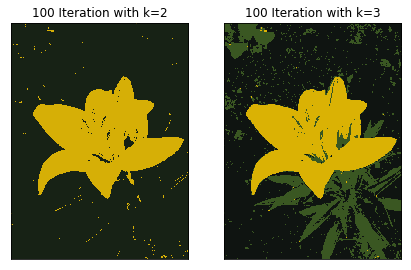

In [8]:
#showing the segmented image after 100 runs
label,centers=k_means(traind,2,100)
print(centers)
centers *= 255.0
print(centers)
centers = np.uint8(centers)
segmented_image = centers[label.flatten()]
segmented_image = segmented_image.reshape(img.shape)

label,centers=k_means(traind,3,100)
centers *= 255.0
centers = np.uint8(centers)
segmented_image2 = centers[label.flatten()]
segmented_image2 = segmented_image2.reshape(img.shape)



plt.figure(figsize=(7,7))
plt.subplot(121), plt.imshow(segmented_image)
plt.title("100 Iteration with k=2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(segmented_image2)
plt.title("100 Iteration with k=3"), plt.xticks([]), plt.yticks([])
plt.show()



# 1.2 Expectation Maximization - Gaussian Mixture Models

iteration1
iteration2
iteration3
iteration4
iteration5
iteration6
iteration7
iteration8
iteration9
iteration10


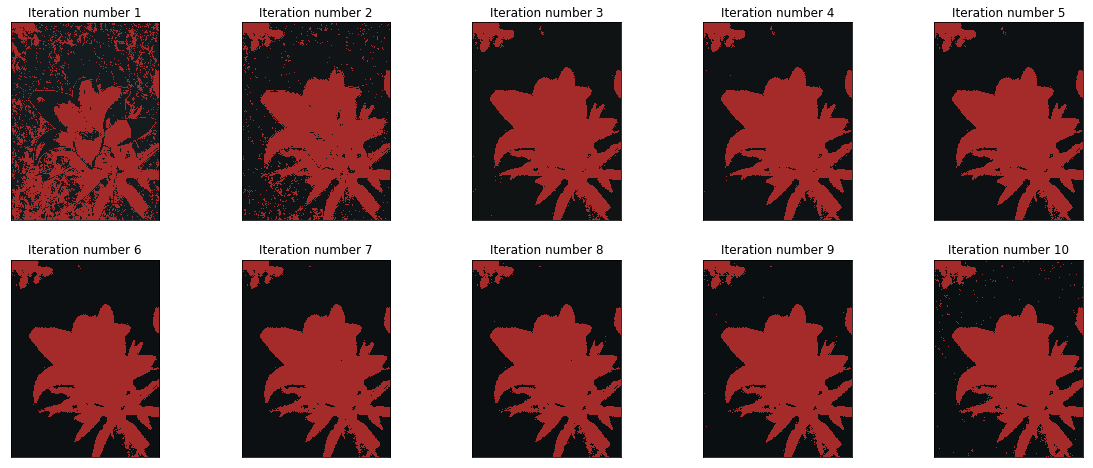

In [12]:
import math
# Read an image
img = cv2.cvtColor(cv2.imread('yellowlily.png'), cv2.COLOR_BGR2RGB)

# Arrange img to a feature matrix and convert it to np.float32
Z = img.reshape((-1,3))
traind = np.float32(Z)

#normalizing the RGB matrix
traind /= 255.0
#print(traind)


traind = np.sort(traind)


# initialization
def initialization(traind,k):
    #calling k means with 1 iteration to get 2 random means a random labels
    label,centers=k_means(traind,k,1)
    #mean = centers
    mean = np.random.uniform(low=0, high=1, size=(2,traind.shape[1]))
    mean[0] = np.mean(traind[:int(len(traind)/2)], axis=0)
    mean[1] = np.mean(traind[int(len(traind)/2):], axis=0)
    label = np.matrix(label)
    label = label[:,np.newaxis]

    samples=traind.shape[0]
    d=traind.shape[1]
    
    # ine itialize a random covariance matrix based on the mean
    covar = np.random.uniform(low=0, high=1, size=(k,d,d))
    for i in range(0,k):
        total = 0
        for j in range(0,samples):
            x_m = traind[j]-mean[i]
            x_m = x_m[:,np.newaxis]
            curr = np.matmul(x_m,x_m.T)
            total = curr+total
        covar[i]=np.divide(total, samples)
    
    #initialize weight for 1st run w=1/2 (50% of it being in each cluster)
    w= np.random.uniform(low=0, high=1, size=(k,1))
    w[0] = 0.5
    w[1] = 0.5
    
    return w,mean,covar

# a method that will return the gaussian prp N
def gauss(traind,meani,covari):
    gss_list =[]
    det=np.linalg.det(covari)
    temp = 1/(np.sqrt(((2*math.pi)**3)*det))
    for j in range(0,traind.shape[0]):
        x_m = traind[j]-meani
        x_m = x_m[:,np.newaxis]
        inv=np.linalg.inv(covari)
        curr = np.matmul(x_m.T,inv)
        curr2 = np.matmul(curr,x_m)
        exp = temp*np.exp(-0.5*curr2)
        gss_list.append(exp)
    return gss_list

# the E-Step
# this will return 2 cluster each with their own probability list
def expectation(traind,mean,covar,w,k):
    sum_list=[]
    num_list=[]
    cluster_EM1=[]
    cluster_EM2=[]
    prp_EM1=[]
    prp_EM2=[]
    label=[]
    
    #conditional probability is calculated according to the slide formula for i in range(0,k):
    for i in range(0,k):
        gss_prp = gauss(traind,mean[i],covar[i])
        sum_gss = w[i]*np.sum(gss_prp)
        sum_list.append(sum_gss)

    sum_dun = np.sum(sum_list)
    
    # compute the probability and then assign point to the cluster with the larger probability
    # labels is alos assigned here ( used for displaying the segmented img)
    for i in range(0,k):
        gss_prp = gauss(traind,mean[i],covar[i])
        num = w[i]*gss_prp
        num /= sum_dun
        num_list.append(num)
    num_list = np.array(num_list)

    for i in range(0,num_list.shape[1]):
        if num_list[0][i] > num_list[1][i]:
            label.append(0)
            cluster_EM1.append(traind[i])
            prp_EM1.append(num_list[0][i])
        else:
            label.append(1)
            cluster_EM2.append(traind[i])
            prp_EM2.append(num_list[1][i])

    return label,prp_EM1,prp_EM2,cluster_EM1,cluster_EM2
    

# the M-Step
def maximization(label,prp_EM1,prp_EM2,cluster_EM1,cluster_EM2,k):
    
   # recompute the weight based on the probability
    Weight[0] = np.sum(prp_EM1)/len(prp_EM1)
    Weight[1] = np.sum(prp_EM2)/len(prp_EM2) 
   
    
    # Recomputing the mean for each cluster
    total_sum=0
    for i in range(0,len(cluster_EM1)):
        temp6=cluster_EM1[i]*prp_EM1[i]
        total_sum = total_sum+temp6
    total_sum /= np.sum(prp_EM1)
    Mean[0]=total_sum
    
    total_sum=0
    for i in range(0,len(cluster_EM2)):
        temp6=cluster_EM2[i]*prp_EM2[i]
        total_sum = total_sum+temp6
    total_sum /= np.sum(prp_EM2)
    Mean[1]=total_sum
    
        
   # Recomputing the covariance matrix for each cluster
    total_sum2=0
    for i in range(0,len(cluster_EM1)):
            x_m_i = cluster_EM1[i]-Mean[0]
            x_m_i = x_m_i[:,np.newaxis]
            curr5 = np.matmul(x_m_i,x_m_i.T)
            curr6=curr5*prp_EM1[i]
            total_sum2 = total_sum2+curr6
    total_sum2 /= np.sum(prp_EM1)
    Sigma[0] = total_sum2       
    
    total_sum2=0
    for i in range(0,len(cluster_EM2)):
            x_m_i = cluster_EM2[i]-Mean[1]
            x_m_i = x_m_i[:,np.newaxis]
            curr5 = np.matmul(x_m_i,x_m_i.T)
            curr6=curr5*prp_EM2[i]
            total_sum2 = total_sum2+curr6
    total_sum2 /= np.sum(prp_EM2)
    Sigma[1] = total_sum2  
    #print(Sigma)

    
    return Weight, Mean, Sigma

# plooting the img for the first 10 iterations
k=2
Weight,Mean,Sigma=initialization(traind,k)
 

# # set figure size
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,8))
#sorce: http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
axes_list = [item for sublist in axes for item in sublist]

for i in range(1,11):
    
    label,prp_EM1,prp_EM2,cluster_EM1,cluster_EM2 = expectation(traind,Mean,Sigma,Weight,k)
    Weight,Mean,Sigma = maximization(label,prp_EM1,prp_EM2,cluster_EM1,cluster_EM2,k)
    
    print("iteration" + str(i))
    mean_print = deepcopy(Mean)
    mean_print *= 255.0 
    # the color can be very similr sometime so used this to make the segmrnted img more clear
    mean_print[1] = (165,42,42) #(220, 20, 60)
    mean_print = np.uint8(mean_print)
    segmented_image = mean_print[label]
    segmented_image = segmented_image.reshape(img.shape)
    ax = axes_list.pop(0)
    ax = plt.subplot(2, 5, i)
    plt.imshow(segmented_image)
    #plt.title("Iteration number " + str(i)), plt.xticks([]), plt.yticks([])
    ax.set_title("Iteration number " + str(i)), plt.xticks([]), plt.yticks([])
    #plt.show()    
    